<a href="https://colab.research.google.com/github/ConradBitt/case_basedosdados/blob/main/Case_base_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case para a Base dos dados

Sugiro que abra a imagem em uma nova guia para que possa dar zoom nas figuras.

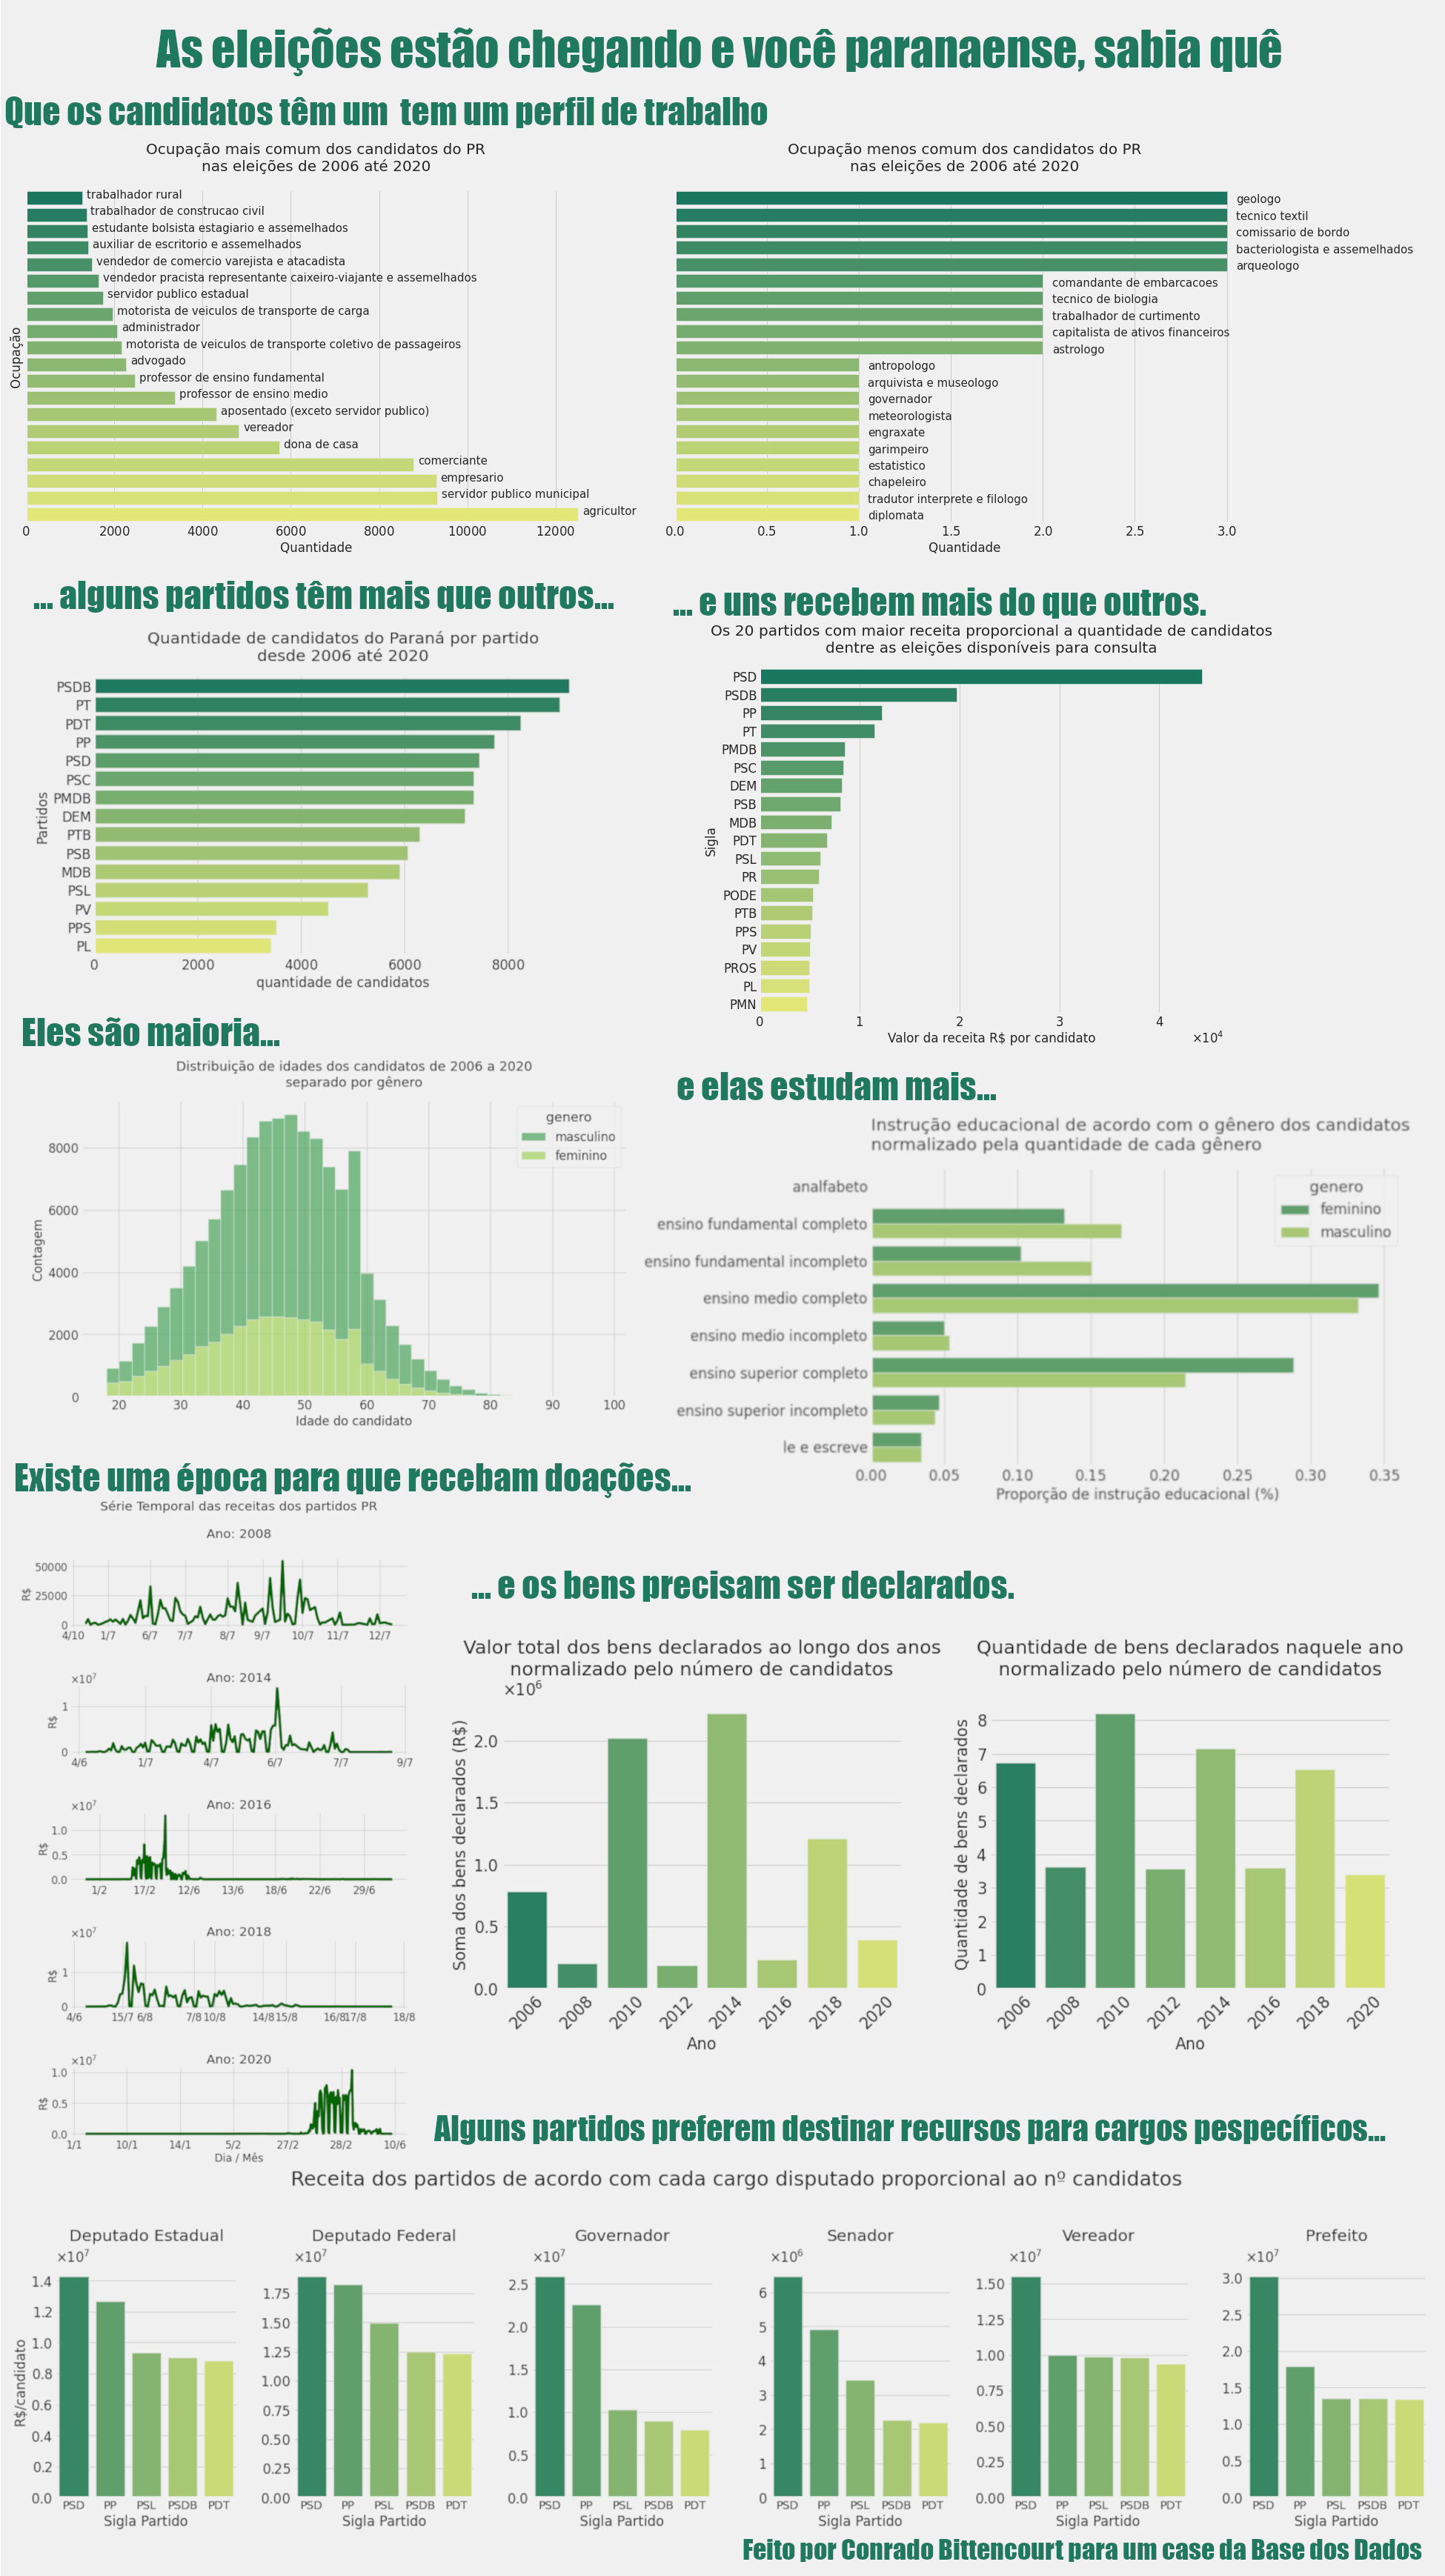

A figura foi produzida utilizando o GIMP e abaixo estão os códigos onde realizei o processamento dos dados.

# Instalações e importações de módulos externos

In [ ]:
#Instalando módulo base dos dados
! pip install basedosdados

In [ ]:
import basedosdados as bd
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker as tkr
mpl.rcParams["axes.formatter.use_mathtext"] = True


import seaborn as sns

from IPython.display import clear_output

sns.set_theme()
sns.set_context('talk')
plt.style.use('fivethirtyeight')

### Versão de cada módulo

In [ ]:
modulos = {
    np.__name__:np.__version__,
    pd.__name__:pd.__version__,
    mpl.__name__:mpl.__version__,
    sns.__name__:sns.__version__,
    bd.__name__: '1.6.1'
}

for modulo, versao in modulos.items():
    print(f'{modulo} == "{versao}"')

numpy == "1.21.5"
pandas == "1.2.4"
matplotlib == "3.2.2"
seaborn == "0.11.2"
basedosdados == "1.6.0"


# Carregando base de dados


Fonte: [Base dos Dados: Eleições Brasileiras](https://basedosdados.org/dataset/br-tse-eleicoes)

In [ ]:
# Estou fazendo essa primeira requisição porque a base não é muito grande.
bens_candidato = bd.read_sql('SELECT ano, id_candidato_bd, valor_item FROM `basedosdados.br_tse_eleicoes.bens_candidato` WHERE sigla_uf = "PR"',
                             billing_project_id='728003624716')

clear_output(True)

Downloading: 100%|██████████| 329730/329730 [00:09<00:00, 35529.19rows/s]


In [ ]:
bens_candidato.head()

,ano,id_candidato_bd,valor_item
0,2010,663868,125132.56
1,2010,663868,53600.00
2,2010,663868,12000.00
3,2010,663868,12000.00
4,2010,663868,18000.00


In [ ]:
bens_candidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329730 entries, 0 to 329729
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              329730 non-null  int64  
 1   id_candidato_bd  323782 non-null  object 
 2   valor_item       328516 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ MB


verificando se não tem valores nulos ou vazios.

---

# Avaliando a soma dos bens declarados e a quantidade de bens declarados

## Quantidade de candidatos ao longo dos anos

In [ ]:
qtd_candidatos_por_anos = bens_candidato.groupby(['ano'])['id_candidato_bd'].nunique().to_frame()
qtd_candidatos_por_anos.columns = ['qtd_candidatos']
qtd_candidatos_por_anos

,qtd_candidatos
ano,
2006,909
2008,18092
2010,663
2012,21042
2014,745
2016,22235
2018,917
2020,25226


## Valor total dos bens declarados ao longo dos anos

In [ ]:
valor_bens_declarados_por_anos = bens_candidato.groupby('ano').sum().reset_index()
valor_bens_declarados_por_anos.columns=['ano','soma_valor_items_declarados']
valor_bens_declarados_por_anos

,ano,soma_valor_items_declarados
0,2006,7.104507e+08
1,2008,3.769745e+09
2,2010,1.338822e+09
3,2012,4.034258e+09
4,2014,1.653060e+09
5,2016,5.285083e+09
6,2018,1.109114e+09
7,2020,9.985461e+09


## Candidato com mais bens declarados em cada ano

In [ ]:
bens_declarados_ano = bens_candidato.groupby('ano')['id_candidato_bd'].size().to_frame()
bens_declarados_ano.columns=['qtd_bens_declarados']
bens_declarados_ano

,qtd_bens_declarados
ano,
2006,6111
2008,65528
2010,5437
2012,75304
2014,5323
2016,80054
2018,5998
2020,85975


### Visualização

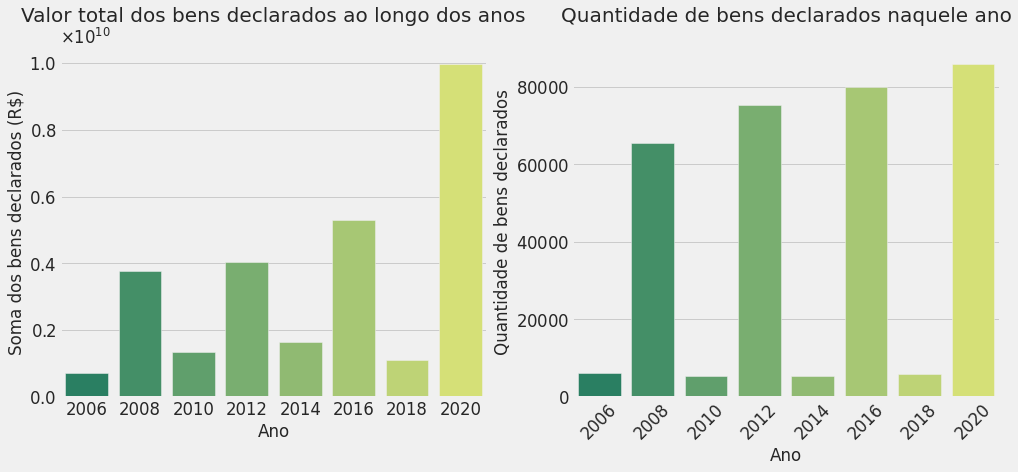

In [ ]:
fig1, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.barplot(data = valor_bens_declarados_por_anos, y='soma_valor_items_declarados', x='ano', ax=ax1, palette='summer')
plt.xticks(rotation=45)
ax1.set_title('Valor total dos bens declarados ao longo dos anos', pad=25, fontsize=20)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Soma dos bens declarados (R$)')

sns.barplot(data = bens_declarados_ano, x=bens_declarados_ano.index, y='qtd_bens_declarados', palette='summer')
plt.xticks(rotation=45)
ax2.set_title('Quantidade de bens declarados naquele ano', pad=25, fontsize=20)
ax2.set_xlabel('Ano')
ax2.set_ylabel('Quantidade de bens declarados')
plt.show()

> Com os dois gráficos acima podemos verificar duas informações a respeito do estado do Paraná, primeiro é que ao longo dos anos a soma dos valores dos bens declarados aumentou, por outro lado, a quantidade de bens declarado das pessoas que mais declararam bens naquela eleição diminui com o passar dos anos.

> Outro ponto é a sazonalidade, as eleições cuja a candidatura são para os cargos do executivo e legislativo federal e estadual tende a ter uma um valor total de bens declarados menor do que as eleições para esferas do municipais. 

> **Mas note que essa distorção pode ser devido a proporção de candidatos em cada eleição. Geralmente eleições municipais tem mais candidatos do que as federais e estaduais.**

## Normalizando pelo numero de candidatos

In [ ]:
valor_bens_declarados_por_anos

,ano,soma_valor_items_declarados
0,2006,7.104507e+08
1,2008,3.769745e+09
2,2010,1.338822e+09
3,2012,4.034258e+09
4,2014,1.653060e+09
5,2016,5.285083e+09
6,2018,1.109114e+09
7,2020,9.985461e+09


In [ ]:
qtd_candidatos_por_anos

,qtd_candidatos
ano,
2006,909
2008,18092
2010,663
2012,21042
2014,745
2016,22235
2018,917
2020,25226


In [ ]:
qtd_bens_soma_valor_items_declarados = pd.concat([bens_declarados_ano, valor_bens_declarados_por_anos.set_index('ano'), qtd_candidatos_por_anos], axis=1)
qtd_bens_soma_valor_items_declarados

,qtd_bens_declarados,soma_valor_items_declarados,qtd_candidatos
ano,,,
2006,6111,7.104507e+08,909
2008,65528,3.769745e+09,18092
2010,5437,1.338822e+09,663
2012,75304,4.034258e+09,21042
2014,5323,1.653060e+09,745
2016,80054,5.285083e+09,22235
2018,5998,1.109114e+09,917
2020,85975,9.985461e+09,25226


In [ ]:
qtd_bens_soma_valor_items_declarados['qtd_bens_normalizado'] = qtd_bens_soma_valor_items_declarados['qtd_bens_declarados'] / qtd_bens_soma_valor_items_declarados['qtd_candidatos']
qtd_bens_soma_valor_items_declarados['soma_valor_items_normalizado'] = qtd_bens_soma_valor_items_declarados['soma_valor_items_declarados'] / qtd_bens_soma_valor_items_declarados['qtd_candidatos']
qtd_bens_soma_valor_items_declarados = qtd_bens_soma_valor_items_declarados.iloc[:,-2:].reset_index()
qtd_bens_soma_valor_items_declarados.columns = ['ano','qtd_bens_normalizado','soma_valor_items_normalizado']
qtd_bens_soma_valor_items_declarados

,ano,qtd_bens_normalizado,soma_valor_items_normalizado
0,2006,6.722772,7.815739e+05
1,2008,3.621932,2.083653e+05
2,2010,8.200603,2.019339e+06
3,2012,3.578747,1.917241e+05
4,2014,7.144966,2.218873e+06
5,2016,3.600360,2.376921e+05
6,2018,6.540894,1.209503e+06
7,2020,3.408190,3.958401e+05


### Visualização

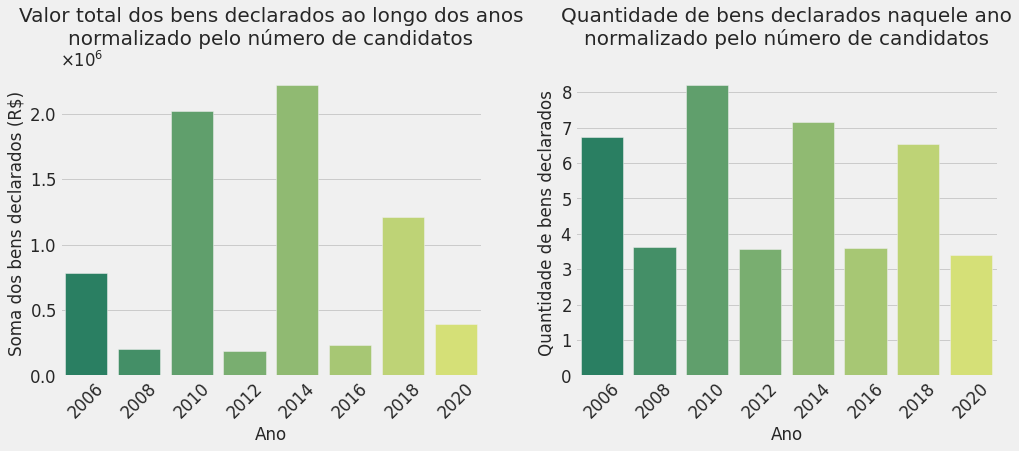

In [ ]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
fig2.tight_layout(pad=3.5)
sns.barplot(data = qtd_bens_soma_valor_items_declarados, y='soma_valor_items_normalizado', x='ano', ax=ax1, palette='summer')
plt.xticks(rotation=45)
ax1.set_title('Valor total dos bens declarados ao longo dos anos\nnormalizado pelo número de candidatos', pad=25, fontsize=20)
ax1.set_xlabel('Ano')
ax1.set_xticklabels(qtd_bens_soma_valor_items_declarados.ano.unique(),rotation=45)
ax1.set_ylabel('Soma dos bens declarados (R$)')

sns.barplot(data = qtd_bens_soma_valor_items_declarados, x='ano', y='qtd_bens_normalizado', palette='summer')
plt.xticks(rotation=45)
ax2.set_title('Quantidade de bens declarados naquele ano\nnormalizado pelo número de candidatos', pad=25, fontsize=20)
ax2.set_xlabel('Ano')
ax2.set_ylabel('Quantidade de bens declarados')
plt.show()

> O valor total dos bens declarados proporcional a quantidade de candidatos tem um comportamento bem diferente do gráfico anterior. Nas eleições municipais o valor cresce levemente com o passar dos anos, ao passo que das eleições federais e estaduais o valor total dos bens declarados cresce nos anos de 2006, 2010 e 2014, mas caiu em 2018.

> Já a quantidade de bens declarados proporcional a quantidade de candidatos nas eleições federais e estaduais cresceu de 2006 para 2010, mas caiu nos anos seguintes, em contrapartida a quantidade de bens declarados proporcional a quantidade de candidatos nas eleições municipais variou muito pouco ao longo dos anos.

# Avaliando Candidatos do Paraná

## Analisando registros candidatos

In [ ]:
# Estou fazendo esta requisição pois verifiquei no BigQuery da Base dos Dados que ela não é muito grande
candidato = bd.read_sql('SELECT ano,id_candidato_bd, ocupacao, idade, genero, instrucao, sigla_partido FROM `basedosdados.br_tse_eleicoes.candidatos` WHERE id_candidato_bd IS NOT NULL AND ano >= 2006 AND idade >= 18 AND sigla_uf = "PR"',
                        billing_project_id='728003624716')

Downloading: 100%|██████████| 130465/130465 [00:11<00:00, 11786.17rows/s]


In [ ]:
candidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130465 entries, 0 to 130464
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              130465 non-null  int64 
 1   id_candidato_bd  130465 non-null  object
 2   ocupacao         130465 non-null  object
 3   idade            130465 non-null  int64 
 4   genero           130465 non-null  object
 5   instrucao        130465 non-null  object
 6   sigla_partido    130465 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.0+ MB


In [ ]:
candidato.head()

,ano,id_candidato_bd,ocupacao,idade,genero,instrucao,sigla_partido
0,2018,7346,psicologo,37,masculino,ensino superior completo,PPL
1,2018,23275,medico,34,masculino,ensino superior completo,NOVO
2,2018,31946,advogado,42,masculino,ensino superior completo,PMB
3,2018,53912,advogado,38,feminino,ensino superior completo,PPL
4,2018,57345,advogado,39,feminino,ensino superior completo,NOVO


Quantidade de anos em que teve eleições

In [ ]:
candidato.ano.unique()

array([2018, 2006, 2010, 2014, 2012, 2008, 2016, 2020])

Quantidade de candidatos desde 2006

In [ ]:
quantidade_candidatos = len(candidato.id_candidato_bd.unique())
quantidade_candidatos

91420

verificar se tem `id_candidato_bd` com mais de um registro por eleição:

In [ ]:
candidato_registro_por_eleicao = candidato['id_candidato_bd'].value_counts()

In [ ]:
candidato_registro_por_eleicao

1201061    8
1151139    8
1000964    8
1383718    8
1431244    8
          ..
912974     1
1534514    1
1107670    1
76002      1
383338     1
Name: id_candidato_bd, Length: 91420, dtype: int64

In [ ]:
selecao_candidatos_mais_registros_por_ano = [candidato_registro_por_eleicao.index[i] for i in range(quantidade_candidatos) if candidato_registro_por_eleicao[i] > 8] 
selecao_candidatos_mais_registros_por_ano

[]

> A princípio pensei em selecionar e remover esses `id_candidato_bd` com mais de 8 registros na tentativa de eliminar candidatos que tenham mais de um registro com eleição. Entretanto o método `value_counts()` não é adequado para isso, pois se a pessoa se candidatou apenas uma vez e tem dois registros na eleição deste ano o método `value_counts()` vai contar duas participaçoes.

Tendo em vista esse problema acima decidi usar um algoritmo que vai agrupar o dataframe por `id_candidato_bd` em seguida por `ano` e para cada grupo vai verificar quantos registros tem e retornar apenas o mais recente (o último).

Por exemplo, vejamos o candidato com `id_candidato_bd = 800062`:

In [ ]:
candidato_teste = bd.read_sql('SELECT * FROM `basedosdados.br_tse_eleicoes.candidatos` WHERE id_candidato_bd = "800062"',
                              billing_project_id='728003624716')

Downloading: 100%|██████████| 10/10 [00:00<00:00, 59.60rows/s]


In [ ]:
candidato_teste.head()

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,nome,nome_urna,numero_partido,sigla_partido,cargo,situacao,ocupacao,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,2006,eleicao ordinaria,PI,None,None,800062,21729697372,000078191503,10331,177,Antonio Almeida De Sousa,Tóim,17,PSL,senador,indeferido,outros,1962-10-16,44,masculino,ensino superior incompleto,casado(a),brasileira,PI,Teresina,None,None
1,2006,eleicao ordinaria,PI,None,None,800062,21729697372,000078191503,10481,177,Antonio Almeida De Sousa,Antonio Almeida O Tõim,17,PSL,senador,deferido,astronomo,1962-10-16,44,masculino,ensino superior incompleto,casado(a),brasileira,PI,Teresina,None,None
2,2010,eleicao ordinaria,PI,None,None,800062,21729697372,000078191503,180000000364,177,Antonio Almeida De Sousa,Toim Dufrango,17,PSL,senador,deferido,empresario,1962-10-16,48,masculino,ensino superior incompleto,casado(a),brasileira,PI,Teresina,None,None
3,2018,eleicao ordinaria,PI,None,None,800062,21729697372,000078191503,180000620154,31278,Antonio Almeida De Sousa,Toinho Dufrango,31,PHS,deputado estadual,deferido,outros,1962-10-16,56,masculino,ensino superior incompleto,casado(a),brasileira,PI,Teresina,toimdufrango@hotmailcom,parda
4,2014,eleicao ordinaria,PI,None,None,800062,21729697372,000078191503,180000000067,3677,Antonio Almeida De Sousa,Toim Dufrango,36,PTC,deputado federal,deferido,comerciante,1962-10-16,52,masculino,ensino superior incompleto,casado(a),brasileira,PI,Teresina,toimdufrango@hotmailcom,parda


In [ ]:
teste = candidato_teste.query('id_candidato_bd == "800062"').sort_values(by='ano')[['ano','id_candidato_bd','sigla_uf','ocupacao','idade','instrucao']]
teste

,ano,id_candidato_bd,sigla_uf,ocupacao,idade,instrucao
7,2004,800062,PI,artesao,42,ensino superior incompleto
0,2006,800062,PI,outros,44,ensino superior incompleto
1,2006,800062,PI,astronomo,44,ensino superior incompleto
5,2008,800062,PI,empresario,46,ensino superior incompleto
2,2010,800062,PI,empresario,48,ensino superior incompleto
6,2012,800062,PI,comerciante,50,ensino superior incompleto
4,2014,800062,PI,comerciante,52,ensino superior incompleto
9,2016,800062,PI,outros,54,ensino superior incompleto
3,2018,800062,PI,outros,56,ensino superior incompleto
8,2020,800062,PI,comerciante,58,ensino medio incompleto


> Note por exemplo que o candidato de `id_candidato_bd = 800062` tem dois registros no ano de 2006.

Precisamos então criar um filtro que agrupe os candatos por id e depois por ano. Só então selecionar o ultimo registro daquele ano. Para selecionar este problema vou usar criar uma função 

In [ ]:
def retorna_ultimo_registro(registro_agrupado):
    """
    Criada para receber grupos de dataframe e retornar 
    apenas o ultimo registro.
    - registro_agrupado (pandas.DataFrame): dataframe agrupado por groupby.

    return: ultimo registro do dataframe agrupado.
    """
    # Do registro agrupado por ano retorna sempre o ultimo
    # caso tenha sido registrado duas vezes em um ano eleitoral
    return registro_agrupado.iloc[-1,:]
    

In [ ]:
%%time
teste.groupby(['id_candidato_bd','ano']).apply(retorna_ultimo_registro)

CPU times: user 11.7 ms, sys: 1.03 ms, total: 12.8 ms
Wall time: 15.6 ms


ano id_candidato_bd  ... idade                   instrucao
id_candidato_bd ano                         ...                                  
800062          2004  2004          800062  ...    42  ensino superior incompleto
                2006  2006          800062  ...    44  ensino superior incompleto
                2008  2008          800062  ...    46  ensino superior incompleto
                2010  2010          800062  ...    48  ensino superior incompleto
                2012  2012          800062  ...    50  ensino superior incompleto
                2014  2014          800062  ...    52  ensino superior incompleto
                2016  2016          800062  ...    54  ensino superior incompleto
                2018  2018          800062  ...    56  ensino superior incompleto
                2020  2020          800062  ...    58     ensino medio incompleto

[9 rows x 6 columns]

> Agora o candidato de `id_candidato_bd = 800062` tem apenas um registro em 2006.

Note que demorou 9 ms para executar este algorítmo em um único registro e eu preciso executar para 130465 registros, não é muito grande, mas dependendo da quantidade pode demorar muito e neste caso uma sugestão é usar o módulo de computação paralela que manipula dataframes [Dask](https://dask.org/).

### Filtro pra remover registros duplicados

In [ ]:
def retorna_ultimo_registro(registro_agrupado):
    """
    Criada para receber grupos de dataframe e retornar 
    apenas o ultimo registro.
    - registro_agrupado (pandas.DataFrame): dataframe agrupado por groupby.

    return: ultimo registro do dataframe agrupado.
    """
    # Do registro agrupado por ano retorna sempre o ultimo
    # caso tenha sido registrado duas vezes em um ano eleitoral
    return registro_agrupado.iloc[-1,:]
    

def remove_candidatos_duplicados(dataframe):
    """
    Função para remover os registros de candidatos que
    tenham mais de um id_candidato_bd por ano.

    - dataframe (pandas.DataFrame): dataframe com coluna "id_candidato_bd" e "ano"

    return: novo_df (pandas.DataFrame): dataframe com um único registro do candidato por ano.
    """

    novo_df = dataframe.groupby(['id_candidato_bd','ano']).apply(retorna_ultimo_registro).drop(['ano','id_candidato_bd'], axis=1).reset_index(level=1).reset_index()
    return novo_df

In [ ]:
%%time
candidato_filtrado = remove_candidatos_duplicados(candidato)

CPU times: user 44.2 s, sys: 519 ms, total: 44.7 s
Wall time: 46.6 s


In [ ]:
candidato_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130092 entries, 0 to 130091
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_candidato_bd  130092 non-null  object
 1   ano              130092 non-null  int64 
 2   ocupacao         130092 non-null  object
 3   idade            130092 non-null  int64 
 4   genero           130092 non-null  object
 5   instrucao        130092 non-null  object
 6   sigla_partido    130092 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.9+ MB


Note que removemos de fato alguns registros.

In [ ]:
print(f'Foram {len(candidato) - len(candidato_filtrado)} registros removidos pelo filtro.')

Foram 373 registros removidos pelo filtro.


## Analisando Ocupação dos Candidatos

In [ ]:
ocupacao_candidato = candidato_filtrado.groupby('ocupacao').size().sort_values().reset_index()
ocupacao_candidato.columns = ['ocupacao','quantidade']
ocupacao_candidato

,ocupacao,quantidade
0,diplomata,1
1,tradutor interprete e filologo,1
2,chapeleiro,1
3,estatistico,1
4,garimpeiro,1
...,...,...
233,comerciante,8782
234,empresario,9294
235,servidor publico municipal,9325
236,agricultor,12510


In [ ]:
ocupacao_mais_comuns = ocupacao_candidato[-21:-1].reset_index(drop=True)[::-1]
ocupacao_menos_comuns = ocupacao_candidato[:20].reset_index(drop=True)

In [ ]:
ocupacao_mais_comuns[::-1]

,ocupacao,quantidade
0,trabalhador rural,1280
1,trabalhador de construcao civil,1366
2,estudante bolsista estagiario e assemelhados,1386
3,auxiliar de escritorio e assemelhados,1405
4,vendedor de comercio varejista e atacadista,1484
5,vendedor pracista representante caixeiro-viaja...,1645
6,servidor publico estadual,1745
7,motorista de veiculos de transporte de carga,1968
8,administrador,2063
9,motorista de veiculos de transporte coletivo d...,2170


### Visualização

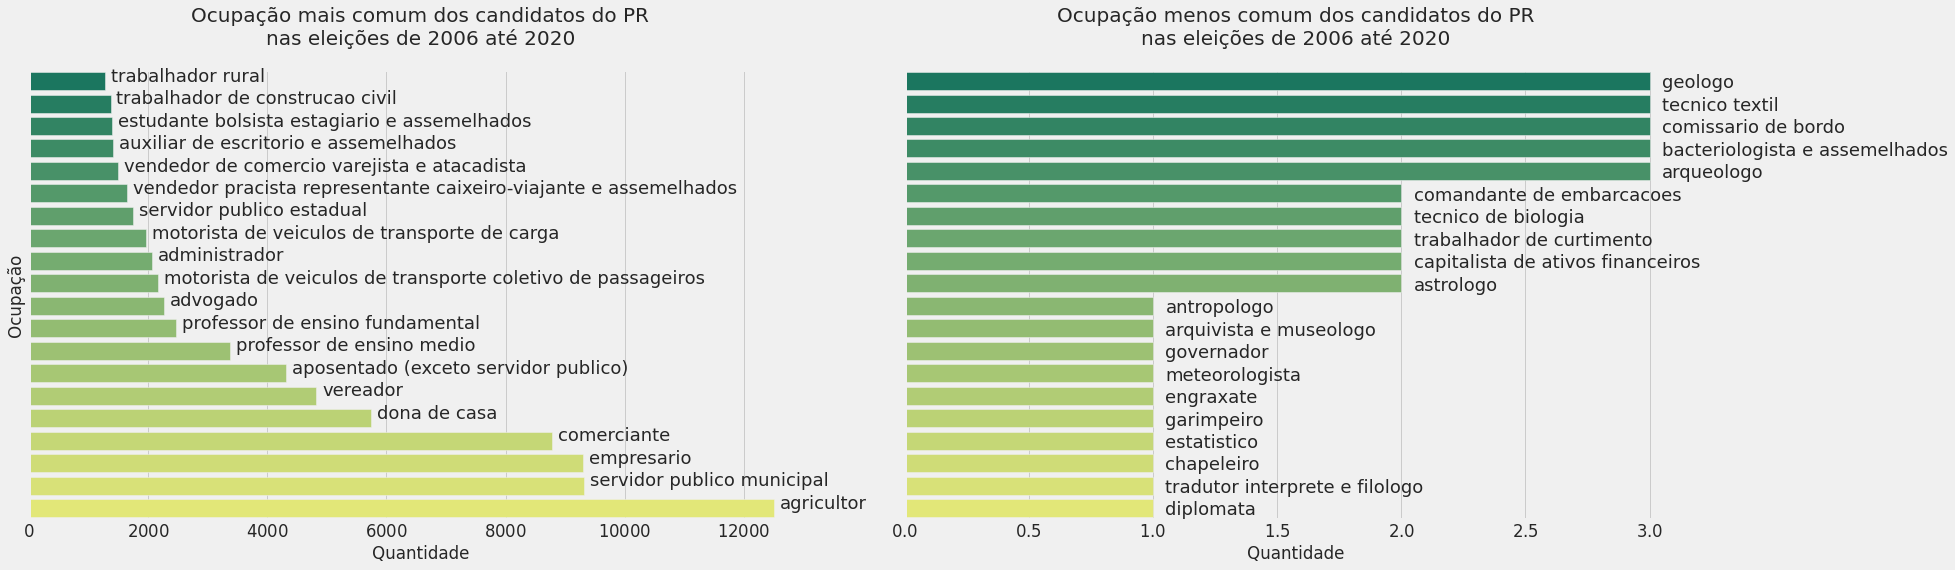

In [ ]:

fig4, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(25,8))
fig4.tight_layout(pad=3.5)
g1 = sns.barplot(data = ocupacao_mais_comuns[::-1], y='ocupacao', x='quantidade', ax=ax1, orient='h', palette='summer')
ax1.set_title('Ocupação mais comum dos candidatos do PR\nnas eleições de 2006 até 2020', pad=25, fontsize=20)
ax1.set_xlabel('Quantidade')
ax1.set_ylabel('Ocupação')
g1.set(yticks=[])

#Colocando a quantidade em cada barra
for barra in range(len(ocupacao_mais_comuns)):
   ax1.text(ocupacao_mais_comuns.quantidade[barra] + 100, barra, ocupacao_mais_comuns.ocupacao[barra], fontsize=18)

g2 = sns.barplot(data = ocupacao_menos_comuns[::-1], x='quantidade', orient='h', ax=ax2, y='ocupacao', palette='summer')
ax2.set_title('Ocupação menos comum dos candidatos do PR\nnas eleições de 2006 até 2020', pad=25, fontsize=20)
ax2.set_xlabel('Quantidade')
ax2.set_ylabel('')
g2.set(yticks=[])

for barra in range(len(ocupacao_menos_comuns)):
   ax2.text(ocupacao_menos_comuns.quantidade[::-1].iloc[barra] + 0.05, barra + 0.3, ocupacao_menos_comuns.ocupacao[::-1].iloc[barra], fontsize=18)

plt.show()

> Acima temos dois graficos que dizem respeito a ocupação dos candidatos desde 2006 até 2020.

> O grafico da esquerda mostra que a ocupação mais comum entre todos esses candidatos é de agricultor, seguido de servidor público municipal em seguida comerciante.

> A ilustração da direita por outro lado mostra a ocupação menos comum entre todos os candidatos que já concorreram a alguma eleição dentro do periodo de 2006 a 2020 no estado do Paraná.

## Analisando idade

### Visualização

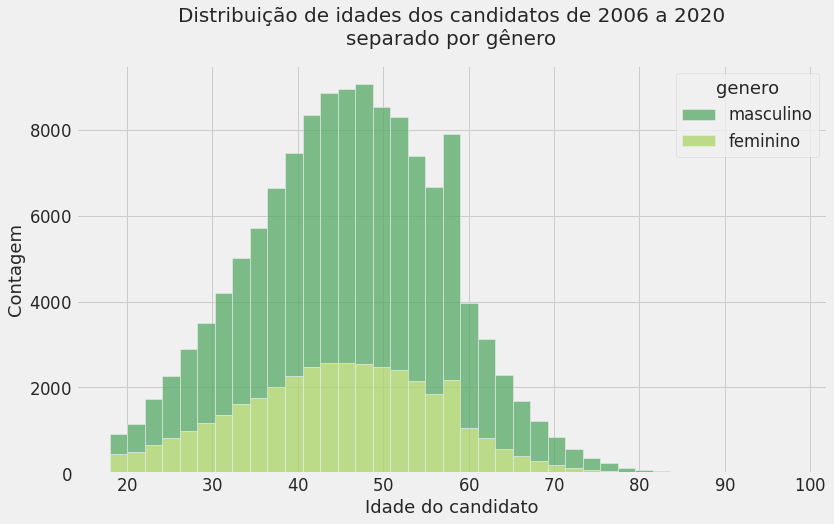

In [ ]:
sns.set_theme()
sns.set_context("talk")
plt.style.use('fivethirtyeight')

fig5, ax = plt.subplots(figsize=(12,7))
sns.histplot(data = candidato_filtrado, x = 'idade', hue='genero',
             multiple='stack',palette='summer',
             bins=39, ax=ax)
ax.set_title('Distribuição de idades dos candidatos de 2006 a 2020\nseparado por gênero', pad=20, fontsize=20);
ax.set_ylabel('Contagem', fontsize=18)
ax.set_xlabel('Idade do candidato', fontsize=18)
fig5;

## Instrução educacional

In [ ]:
candidato_filtrado.head()

,id_candidato_bd,ano,ocupacao,idade,genero,instrucao,sigla_partido
0,1000033,2008,vendedor pracista representante caixeiro-viaja...,49,masculino,ensino medio incompleto,PDT
1,1000033,2012,comerciante,53,masculino,ensino medio incompleto,PDT
2,1000061,2008,agricultor,60,masculino,ensino fundamental completo,PMDB
3,1000091,2020,outros,62,masculino,ensino medio completo,REPUBLICANOS
4,1000103,2008,servidor publico municipal,51,masculino,ensino medio completo,PMDB


In [ ]:
instrucao_genero = pd.crosstab(candidato.instrucao, candidato.genero, normalize='columns')
instrucao_genero

genero,feminino,masculino
instrucao,,
analfabeto,0.000052,0.000087
ensino fundamental completo,0.131890,0.170678
ensino fundamental incompleto,0.102373,0.150800
ensino medio completo,0.346336,0.332227
ensino medio incompleto,0.049929,0.053726
ensino superior completo,0.287926,0.214612
ensino superior incompleto,0.046738,0.043564
le e escreve,0.034756,0.034305


### Visualização

In [ ]:
instrucao_genero.index

Index(['analfabeto', 'ensino fundamental completo',
       'ensino fundamental incompleto', 'ensino medio completo',
       'ensino medio incompleto', 'ensino superior completo',
       'ensino superior incompleto', 'le e escreve'],
      dtype='object', name='instrucao')

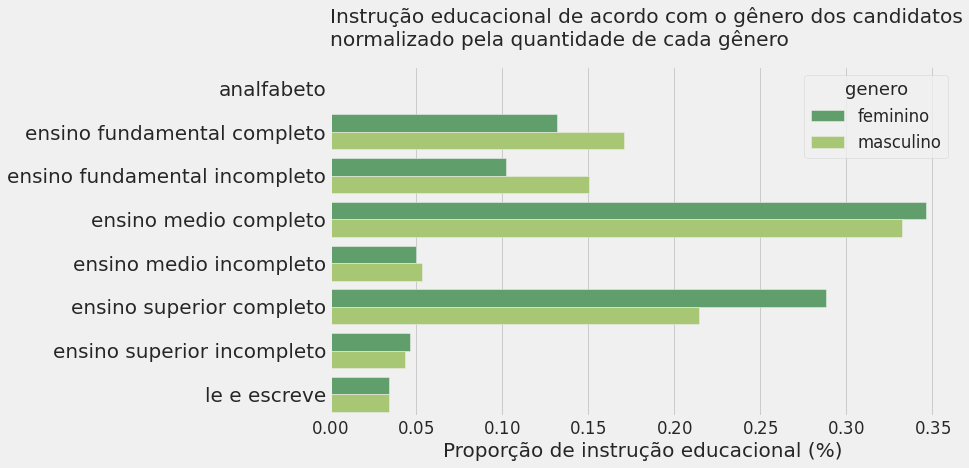

In [ ]:
fig_6, ax = plt.subplots(figsize=(10,6))

g6 = sns.barplot(data = instrucao_genero.melt(ignore_index=False).reset_index(), 
            x = 'value', y = 'instrucao', hue='genero', palette='summer',
            ax=ax)
ax.set_ylabel('')
ax.set_yticklabels(instrucao_genero.index, fontsize=20)
ax.set_xlabel('Proporção de instrução educacional (%)',fontsize=20)
ax.set_title('Instrução educacional de acordo com o gênero dos candidatos\nnormalizado pela quantidade de cada gênero', pad=20, loc='left');

## Candidatos por partidos

In [ ]:
candidato_filtrado

,id_candidato_bd,ano,ocupacao,idade,genero,instrucao,sigla_partido
0,1000033,2008,vendedor pracista representante caixeiro-viaja...,49,masculino,ensino medio incompleto,PDT
1,1000033,2012,comerciante,53,masculino,ensino medio incompleto,PDT
2,1000061,2008,agricultor,60,masculino,ensino fundamental completo,PMDB
3,1000091,2020,outros,62,masculino,ensino medio completo,REPUBLICANOS
4,1000103,2008,servidor publico municipal,51,masculino,ensino medio completo,PMDB
...,...,...,...,...,...,...,...
130087,999986,2012,policial civil,55,masculino,ensino superior completo,PTB
130088,999986,2016,policial civil,59,masculino,ensino medio completo,PSD
130089,999986,2020,policial civil,63,masculino,ensino superior completo,PSL
130090,999994,2012,outros,57,masculino,ensino fundamental incompleto,PSDB


In [ ]:
candidatos_partido = candidato_filtrado.groupby(['sigla_partido']).nunique()['id_candidato_bd'].to_frame().reset_index().sort_values(by='id_candidato_bd', ascending=False)
candidatos_partido.head()

,sigla_partido,id_candidato_bd
32,PSDB,7380
37,PT,7115
11,PDT,6801
31,PSD,6751
30,PSC,6356


In [ ]:
candidatos_partido.columns = ['sigla_partido', 'qtd_candidato']

### Visualização

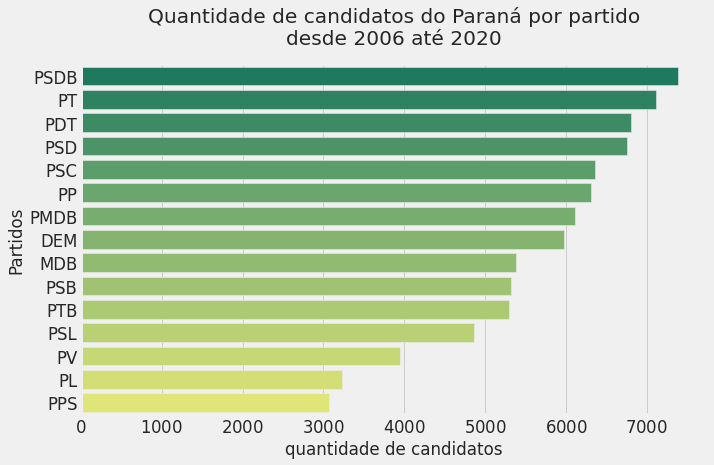

In [ ]:
fig7, ax = plt.subplots(figsize=(10,6))

g7 = sns.barplot(
    data = candidatos_partido[:15], 
    x = 'qtd_candidato', y ='sigla_partido',
    palette='summer', ax=ax
)

ax.set_title('Quantidade de candidatos do Paraná por partido\ndesde 2006 até 2020', pad=20)
ax.set_ylabel('Partidos')
ax.set_xlabel('quantidade de candidatos')

fig7;

# Avaliando receitas (**Temos apenas dados disponíveis a partir de 2008**)

In [ ]:
receita = bd.read_sql('SELECT ano, sigla_uf, id_candidato_bd, sigla_partido, cargo, data_receita, valor_receita FROM `basedosdados.br_tse_eleicoes.receitas_candidato`  WHERE id_candidato_bd IS NOT NULL AND sigla_uf = "PR" AND ano >= 2006',
                      billing_project_id='728003624716')

Downloading: 100%|██████████| 418028/418028 [00:24<00:00, 17028.52rows/s]


In [ ]:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418028 entries, 0 to 418027
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              418028 non-null  int64  
 1   sigla_uf         418028 non-null  object 
 2   id_candidato_bd  418028 non-null  object 
 3   sigla_partido    418028 non-null  object 
 4   cargo            418028 non-null  object 
 5   data_receita     418028 non-null  object 
 6   valor_receita    418028 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.3+ MB


In [ ]:
receita.head()

,ano,sigla_uf,id_candidato_bd,sigla_partido,cargo,data_receita,valor_receita
0,2018,PR,1677933,PRB,deputado estadual,2018-09-04,50000.0
1,2018,PR,1677933,PRB,deputado estadual,2018-10-02,20000.0
2,2018,PR,1677933,PRB,deputado estadual,2018-08-27,5000.0
3,2018,PR,1677933,PRB,deputado estadual,2018-08-27,5000.0
4,2018,PR,1677933,PRB,deputado estadual,2018-10-04,4934.0


In [ ]:
receita.ano.unique()

array([2018, 2014, 2008, 2016, 2020])

> **Temos apenas dados disponíveis a partir de 2008**

In [ ]:
receita.head()

,ano,sigla_uf,id_candidato_bd,sigla_partido,cargo,data_receita,valor_receita
0,2018,PR,1677933,PRB,deputado estadual,2018-09-04,50000.0
1,2018,PR,1677933,PRB,deputado estadual,2018-10-02,20000.0
2,2018,PR,1677933,PRB,deputado estadual,2018-08-27,5000.0
3,2018,PR,1677933,PRB,deputado estadual,2018-08-27,5000.0
4,2018,PR,1677933,PRB,deputado estadual,2018-10-04,4934.0


In [ ]:
receita.groupby('sigla_partido').sum()['valor_receita'].head()

sigla_partido
AVANTE        1591517.73
CIDADANIA     8383502.06
DC             735787.67
DEM          34074965.33
MDB          29567492.86
Name: valor_receita, dtype: float64

In [ ]:
candidatos_partido = candidatos_partido.set_index('sigla_partido')
candidatos_partido['valor_receita'] = receita.groupby('sigla_partido').sum()['valor_receita']
candidatos_partido.head()

,qtd_candidato,valor_receita
sigla_partido,,
PSDB,7380,77968258.55
PT,7115,60564505.07
PDT,6801,29498893.88
PSD,6751,85645943.76
PSC,6356,44704551.13


In [ ]:
candidatos_partido['valor_receita_por_candidato'] = candidatos_partido.valor_receita / candidatos_partido.qtd_candidato
candidatos_partido = candidatos_partido.sort_values(by='valor_receita_por_candidato', ascending=False).reset_index()
candidatos_partido.head()

,sigla_partido,qtd_candidato,valor_receita,valor_receita_por_candidato
0,NOVO,75,3538801.50,47184.020000
1,PEN,45,886968.38,19710.408444
2,REDE,384,5031485.02,13102.825573
3,PSD,6751,85645943.76,12686.408497
4,PSDB,7380,77968258.55,10564.804682


### Visualização

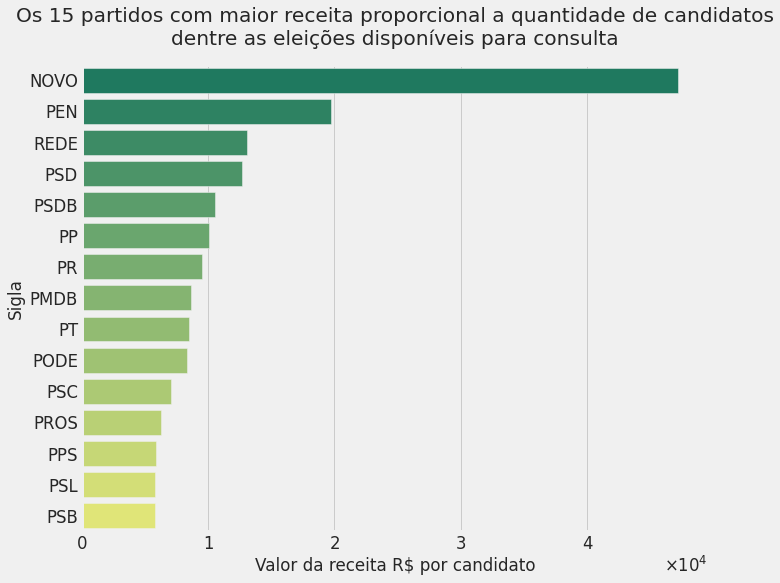

In [ ]:
fig8,ax = plt.subplots(figsize=(10,8))

g8 = sns.barplot(data = candidatos_partido.sort_values(by='valor_receita_por_candidato', ascending=False)[:15], 
                 x = 'valor_receita_por_candidato',
                 y = 'sigla_partido', orient='h',
                 palette='summer')

ax.set_title('Os 15 partidos com maior receita proporcional a quantidade de candidatos\ndentre as eleições disponíveis para consulta', pad=20)
ax.set_ylabel('Sigla')
ax.set_xlabel('Valor da receita R$ por candidato')
plt.ticklabel_format(axis='x', style='scientific', scilimits=(0,4))
fig8;

> Acima temos um gráfico que indica a receita dos 15 maiores partidos com a maior receita proporcional ao seus candidatos. Isso é um indicador rudimentar do quanto cada candidato tem disponível para si. 

> Os partidos com maior receita proporcional ao numero de candidatos são: NOVO, PEN, REDE, PSD e PSDB.

In [ ]:
receita_cargo_partido = receita.groupby(['cargo', 'sigla_partido']).sum()['valor_receita'].to_frame()
receita_cargo_partido

valor_receita
cargo             sigla_partido               
deputado estadual AVANTE             131092.30
                  DC                  82202.52
                  DEM               6983984.27
                  MDB               2666368.13
                  PATRIOTA            34477.54
...                                        ...
vice-prefeito     PSC                  3420.00
                  PSD                 15000.00
                  PSDB                20000.00
                  PT                   6395.93
                  REPUBLICANOS        15000.00

[209 rows x 1 columns]

In [ ]:
receita_cargo_partido.loc['senador'].sort_values(by='valor_receita', ascending=False).head().reset_index()

,sigla_partido,valor_receita
0,PMDB,6473320.93
1,PSDB,4911638.76
2,PODE,3443000.00
3,PT,2254914.88
4,MDB,2185420.62


### Visualização

Text(0.5, 1.25, 'Receita dos partidos de acordo com cada cargo disputado proporcional ao nº candidatos')

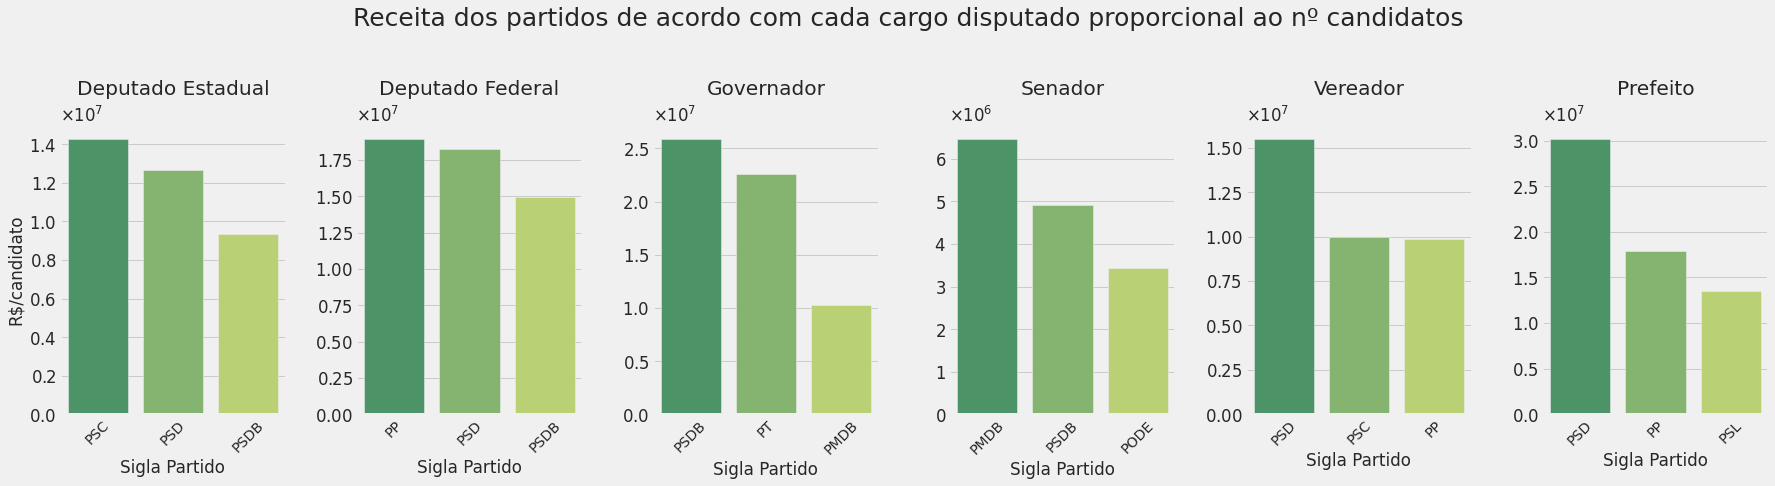

In [ ]:
fig9, ax = plt.subplots(
    ncols = len(receita.cargo.unique()[:-1]),
    nrows = 1,
    figsize=(25,5),
    )
fig9.tight_layout(pad=1.5)

i=0
for cargo in receita.cargo.unique()[:-1]:

    rcp = receita_cargo_partido.loc[str(cargo)].sort_values(by='valor_receita', ascending=False).reset_index()

    sns.barplot(data = rcp[:3],
                y = 'valor_receita', 
                x = 'sigla_partido',
                palette='summer', ax=ax[i]
                )
    ax[i].set_title(f'{cargo.title()}', pad=30)
    ax[i].set_xticklabels(rcp['sigla_partido'], rotation=45, fontsize=14)
    ax[i].set_xlabel('Sigla Partido')
    
    if i>0:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('R$/candidato')

    rcp = _
    i+=1
fig9.suptitle('Receita dos partidos de acordo com cada cargo disputado proporcional ao nº candidatos', y=1.25, fontsize=25)
#

> O gráfico acima indica os três partidos que tem a maior receita de acordo com cada cargo em que seus candidatos estão dispudando. 

### Visualização

## Série temporal do recebimento das receitas

### Transformando data_receita em um datetime

In [ ]:
receita['nova_data_receita'] = pd.to_datetime(receita.data_receita, errors='coerce')
receita.nova_data_receita.mask(receita.nova_data_receita == "208-09-05", "2018-09-05")
receita['nova_data_receita']

0        2018-09-04
1        2018-10-02
2        2018-08-27
3        2018-08-27
4        2018-10-04
            ...    
418023   2020-10-30
418024   2020-11-11
418025   2020-10-30
418026   2020-10-30
418027   2020-11-19
Name: nova_data_receita, Length: 418028, dtype: datetime64[ns]

**Obs**: Coloquei o coerce e porque tem uma string com data escrito errado `208-09-05`, então decidi forçar e substituir por `2018-09-05`.

In [ ]:
serie_temporal_receitas = receita.groupby(['ano','nova_data_receita']).valor_receita.sum()
#serie_temporal_receitas.nova_data_receita.iloc[0] = '2008-10-04 00:00:00'
serie_temporal_receitas

ano   nova_data_receita
2008  2004-10-04             296.31
      2008-07-01              43.50
      2008-07-06             748.75
      2008-07-07            4800.00
      2008-07-08              12.50
                             ...   
2020  2020-12-24            1349.05
      2020-12-28             704.50
      2020-12-29            3072.23
      2020-12-30           26627.94
      2020-12-31           41612.50
Name: valor_receita, Length: 681, dtype: float64

In [ ]:
serie_temporal_receitas.loc[2008].index.month

Int64Index([10,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            10, 10, 10, 10, 11, 11, 11, 11, 11,  9],
           dtype='int64', name='nova_data_receita', length=109)

In [ ]:
np.sort(receita.ano.unique())

array([2008, 2014, 2016, 2018, 2020])

In [ ]:
serie_temporal_receitas[2008].rolling(5).mean().to_frame()

,valor_receita
nova_data_receita,
2004-10-04,NaN
2008-07-01,NaN
2008-07-06,NaN
2008-07-07,NaN
2008-07-08,1180.212
...,...
2008-11-03,2695.938
2008-11-04,2872.494
2008-11-06,2748.420


### Visualização

Text(0.5, 50.100000000000065, 'Dia / Mês')

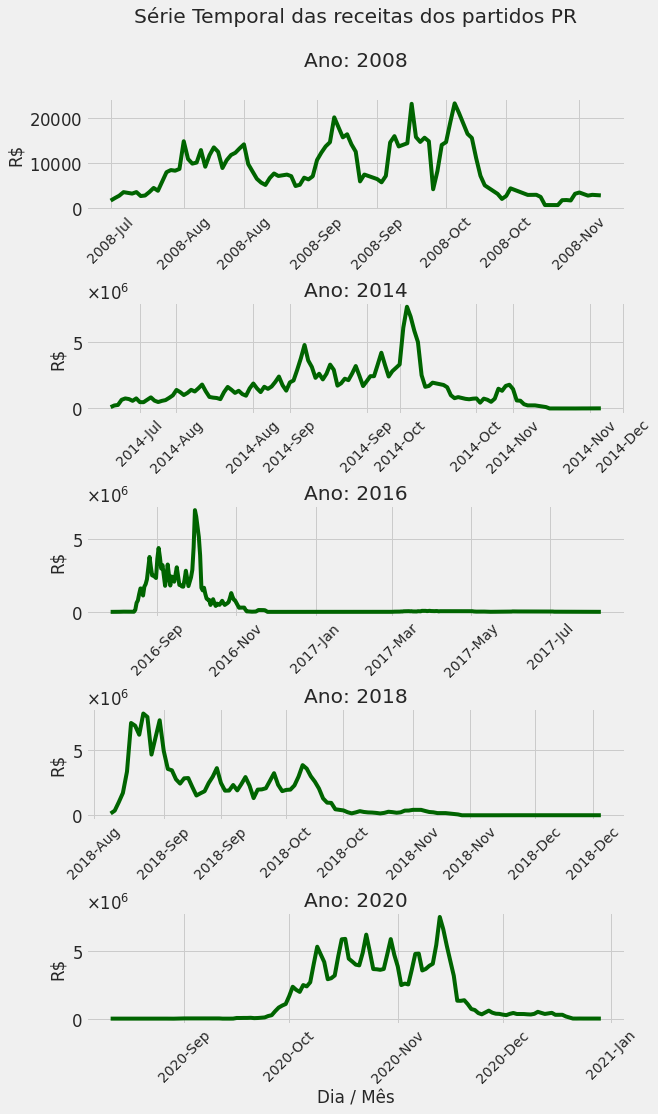

In [ ]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')

i=0
fig, ax = plt.subplots(ncols=1, nrows=len(receita.ano.unique()), figsize=(10,15))
fig.tight_layout(pad=4.5)


for ano in np.sort(receita.ano.unique()):
    serie_temp = serie_temporal_receitas.loc[ano].rolling(5).mean().iloc[10:-2]
    
    sns.lineplot(data = serie_temp, ax=ax[i], color='darkgreen')
    
    #ax[i].set_xticklabels([f'{dia}/{mes}' for dia, mes in zip(serie_temporal_receitas.loc[ano].index.day, serie_temporal_receitas.loc[ano].index.month)])
    ax[i].set_xticklabels(serie_temp.index, rotation=45, fontsize=14)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ax[i].set_xlabel('')
    if i>0:
        ax[i].set_title(f'\n\nAno: {ano}')
    else:
        ax[i].set_title(f'Série Temporal das receitas dos partidos PR\n\nAno: {ano}', pad=32)
    ax[i].set_ylabel('R$')
    i+=1

ax[i-1].set_xlabel('Dia / Mês')



> Acima temos a série temporal em que as receitas foram pagas aos candidatos, geralmente nos meses de setembro, outubro e novembro.